Line 15 has 8 columns instead of 9: -1 1:-0.411765 2:0.668342 3:0.180328 4:-0.616162 5:-0.586288 6:-0.230999 7:-0.565329
Line 25 has 8 columns instead of 9: -1 1:0.294118 2:0.437186 3:0.540984 4:-0.333333 5:-0.654846 6:0.0909091 7:-0.849701
Line 237 has 8 columns instead of 9: -1 1:-0.176471 2:0.819095 3:0.377049 4:-0.575758 5:-0.546099 6:0.0700448 7:-0.566183
Line 260 has 8 columns instead of 9: -1 1:0.294118 2:0.557789 3:0.245902 4:-0.434343 5:-0.64539 6:-0.00745157 7:0.088813
Line 286 has 8 columns instead of 9: +1 1:-0.176471 2:0.366834 3:0.213115 4:-0.474747 5:-0.680851 6:-0.225037 7:-0.514091
Line 402 has 8 columns instead of 9: +1 1:-0.294118 2:0.376884 4:-1 5:-1 6:-0.278688 7:-0.93766 8:0.133333
Line 459 has 8 columns instead of 9: -1 1:0.176471 2:0.487437 3:0.377049 4:-0.030303 5:-0.439716 6:0.120715 7:-0.211785
Line 518 has 8 columns instead of 9: +1 1:-0.176471 2:0.256281 3:0.409836 4:-1 5:-1 6:0.120715 7:-0.807003
Line 659 has 8 columns instead of 9: +1 1:0.294118 2:0.27638

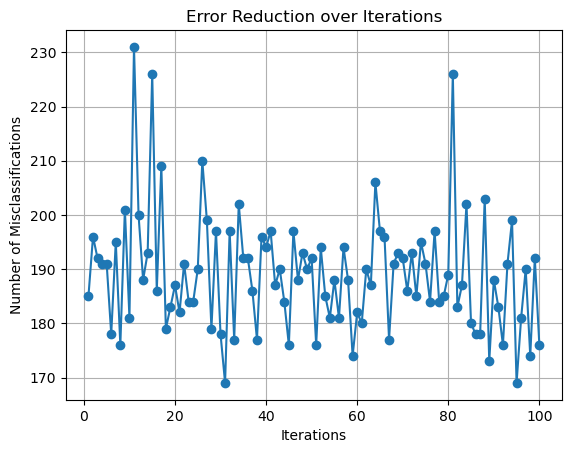

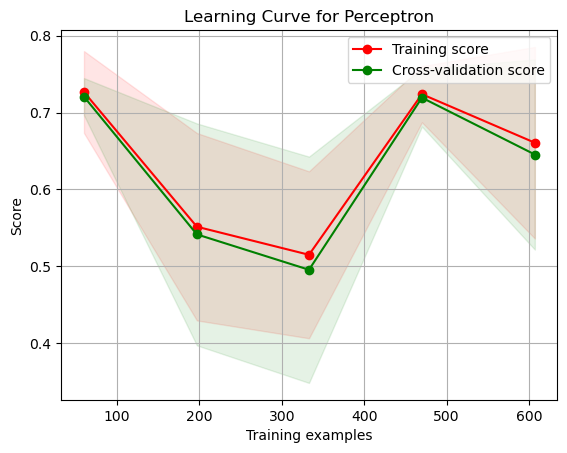

In [42]:
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Read data and process invalid rows
with open('/Users/jasper/Desktop/assignments/deep learning/Assignment1/diabetes_scale.txt') as f:
    lines = f.readlines()

valid_lines = []
invalid_lines = []
for i, line in enumerate(lines):
    cols = line.strip().split(' ')
    if len(cols) == 9:
        valid_lines.append(line)
    else:
        print(f"Line {i + 1} has {len(cols)} columns instead of 9: {line.strip()}")

# Write valid lines to a new file
clean_file_path = '/Users/jasper/Desktop/assignments/deep learning/Assignment1/diabetes_scale_clean.txt'
with open(clean_file_path, 'w') as f:
    f.writelines(valid_lines)


# Define input file path and cleaned file path
input_file_path = '/Users/jasper/Desktop/assignments/deep learning/Assignment1/diabetes_scale_clean.txt'
cleaned_file_path = '/Users/jasper/Desktop/assignments/deep learning/Assignment1/diabetes_scale_cleaned.txt'

# Use regular expressions to clean the data, remove the "1:" prefix, and keep only the values.
with open(input_file_path, 'r') as f:
    cleaned_lines = []
    for line in f:
        cleaned_line = re.sub(r'\d+:(-?\d+\.?\d*)', r'\1', line)
        cleaned_lines.append(cleaned_line)

#Write the cleaned data to a new file
with open(cleaned_file_path, 'w') as f:
    f.writelines(cleaned_lines)

# Use np.genfromtxt to load the cleaned data
data = np.genfromtxt(cleaned_file_path, delimiter=' ')

print(f" {data.shape}")
print(f"\n{data[:5]}")


imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data)


X = data[:, 1:]  
y = data[:, 0]   


print(f" {X.shape}")
print(f" {y.shape}")
    
if data.shape[0] == 0:
    raise ValueError("The data set is empty, please check the data processing proces.")

X = data[:, 1:]  
y = data[:, 0]   

if X.shape[1] == 0:
    raise ValueError("No valid features, please check the dataset.")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# creat Perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3, eta0=1.0)

# Train the model and log errors in each iteration
errors = []
n_iterations = 100
for i in range(n_iterations):
    perceptron.partial_fit(X_train, y_train, classes=np.unique(y_train))
    y_pred_train = perceptron.predict(X_train)
    errors.append(np.sum(y_train != y_pred_train))

# prediction 
y_pred = perceptron.predict(X_test)

# assessment
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# error rate
plt.figure()
plt.plot(range(1, n_iterations + 1), errors, marker='o')
plt.title("Error Reduction over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Number of Misclassifications")
plt.grid(True)
plt.show()

# learning curve
train_sizes, train_scores, test_scores = learning_curve(perceptron, X, y, cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve for Perceptron")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()
